In [5]:

import json
import re 
import numpy as np
import pandas as pd
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline



In [6]:
# %%
with open("Gossiping-39000-39125.json", encoding="utf-8") as f:
    data = json.load(f)


In [7]:
# %%
type(data), data.keys()


(dict, dict_keys(['articles']))

In [8]:
# %%
type(data['articles']), data['articles'][0].keys()


(list,
 dict_keys(['article_id', 'article_title', 'author', 'board', 'content', 'date', 'ip', 'message_count', 'messages', 'url']))

In [9]:
# %%
data['articles'][0]


{'article_id': 'M.1601291958.A.420',
 'article_title': '[問卦] 急! 梅子粉除了沾芭樂還可以配什麼？',
 'author': 'GenYDad (諸神黃昏)',
 'board': 'Gossiping',
 'content': '肥宅大家晚餐愉快 小弟前陣子去某某老街買了包梅子粉 因為這粉沾芭樂真是好吃啊 切條塊後直接插入粉裡面 上面沾了一層厚厚的 送入口中，歐麥酸酸甜甜超好吃真涮嘴 https://i.imgur.com/P732jeK.jpg 剛剛把買來的兩顆芭樂嗑光 現在口水還在流 請問梅子粉除了沾芭樂或是站手指吸允之外 還能怎樣利用？ ',
 'date': 'Mon Sep 28 19:19:16 2020',
 'ip': '49.216.170.192',
 'message_count': {'all': 50,
  'boo': 3,
  'count': 25,
  'neutral': 19,
  'push': 28},
 'messages': [{'push_content': '二樓把梅子粉塗在三樓的龜頭上四樓就會衝過去吃',
   'push_ipdatetime': '09/28 19:19',
   'push_tag': '→',
   'push_userid': 'james732'},
  {'push_content': '五樓都配老二  給你參考',
   'push_ipdatetime': '09/28 19:19',
   'push_tag': '推',
   'push_userid': 'sx4152'},
  {'push_content': '雞排',
   'push_ipdatetime': '09/28 19:19',
   'push_tag': '→',
   'push_userid': 'jienan'},
  {'push_content': '地瓜條啊',
   'push_ipdatetime': '09/28 19:19',
   'push_tag': '推',
   'push_userid': 'Alex500'},
  {'push_content': '地瓜薯條',
   'push_ipdatetime':

In [10]:
# %%
df = pd.DataFrame(data['articles'])
df.head()


,article_id,article_title,author,board,content,date,ip,message_count,messages,url
0,M.1601291958.A.420,[問卦] 急! 梅子粉除了沾芭樂還可以配什麼？,GenYDad (諸神黃昏),Gossiping,肥宅大家晚餐愉快 小弟前陣子去某某老街買了包梅子粉 因為這粉沾芭樂真是好吃啊 切條塊後直接插...,Mon Sep 28 19:19:16 2020,49.216.170.192,"{'all': 50, 'boo': 3, 'count': 25, 'neutral': ...","[{'push_content': '二樓把梅子粉塗在三樓的龜頭上四樓就會衝過去吃', 'p...",https://www.ptt.cc/bbs/Gossiping/M.1601291958....
1,M.1601291999.A.BAD,[問卦] 為什麼小孩很喜歡看鬼滅之刃,zuvio (zz),Gossiping,最近鄰居家的小孩很常玩一玩就拿鬼滅之刃的吊飾出來秀 好像看到以前拿卡片出來決鬥就很威的感覺 ...,Mon Sep 28 19:19:57 2020,223.139.93.59,"{'all': 14, 'boo': 2, 'count': 6, 'neutral': 4...","[{'push_content': '喜歡彌豆子呀', 'push_ipdatetime':...",https://www.ptt.cc/bbs/Gossiping/M.1601291999....
2,M.1601292007.A.657,[問卦] 教師節噓老師的是不是很沒教養,iamgaylan (),Gossiping,安安大家好 小弟登入2500次 在八卦版算是資深前輩 以我爆文的數量 我想我做大家老師因該是...,Mon Sep 28 19:20:04 2020,101.137.139.137,"{'all': 7, 'boo': 3, 'count': -1, 'neutral': 2...","[{'push_content': '感同身受', 'push_ipdatetime': '...",https://www.ptt.cc/bbs/Gossiping/M.1601292007....
3,M.1601292072.A.6F1,[新聞] 蘇澳漁船與日本公務船擦撞未出聲？謝長,JAL96 (JAL96),Gossiping,1.媒體來源:聯合 2.記者署名:鄭媁 3.完整新聞標題:蘇澳漁船與日本公務船擦撞未出聲？謝...,Mon Sep 28 19:21:10 2020,114.43.119.224,"{'all': 38, 'boo': 11, 'count': -1, 'neutral':...","[{'push_content': '船上沒人錄影ㄇ', 'push_ipdatetime'...",https://www.ptt.cc/bbs/Gossiping/M.1601292072....
4,M.1601292083.A.5A5,[新聞] 再度惹議！中國遊戲《原神》PC版遭韓國,wajaka (魯雞排),Gossiping,1.媒體來源: Nownew Now電玩 2.記者署名: 吳柏勳 3.完整新聞標題: 再度惹...,Mon Sep 28 19:21:21 2020,111.250.41.114,"{'all': 18, 'boo': 0, 'count': 7, 'neutral': 1...","[{'push_content': '都用華為了還會怕後門喔?', 'push_ipdate...",https://www.ptt.cc/bbs/Gossiping/M.1601292083....


In [11]:
# %%
df.info()
# %%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   article_id     2429 non-null   object
 1   article_title  2428 non-null   object
 2   author         2428 non-null   object
 3   board          2429 non-null   object
 4   content        2429 non-null   object
 5   date           2429 non-null   object
 6   ip             2429 non-null   object
 7   message_count  2429 non-null   object
 8   messages       2429 non-null   object
 9   url            2429 non-null   object
dtypes: object(10)
memory usage: 189.9+ KB


In [12]:
#把message_count 的 all 取出
df['message_count_total'] = df.message_count.apply(lambda x: x['all'])


In [13]:
# %%
df.messages[0]
# %%


[{'push_content': '二樓把梅子粉塗在三樓的龜頭上四樓就會衝過去吃',
  'push_ipdatetime': '09/28 19:19',
  'push_tag': '→',
  'push_userid': 'james732'},
 {'push_content': '五樓都配老二  給你參考',
  'push_ipdatetime': '09/28 19:19',
  'push_tag': '推',
  'push_userid': 'sx4152'},
 {'push_content': '雞排',
  'push_ipdatetime': '09/28 19:19',
  'push_tag': '→',
  'push_userid': 'jienan'},
 {'push_content': '地瓜條啊',
  'push_ipdatetime': '09/28 19:19',
  'push_tag': '推',
  'push_userid': 'Alex500'},
 {'push_content': '地瓜薯條',
  'push_ipdatetime': '09/28 19:19',
  'push_tag': '→',
  'push_userid': 'niburger1001'},
 {'push_content': '樓下吃屎都沾什麼',
  'push_ipdatetime': '09/28 19:19',
  'push_tag': '噓',
  'push_userid': 'Rrrxddd'},
 {'push_content': '懶覺阿幹',
  'push_ipdatetime': '09/28 19:20',
  'push_tag': '噓',
  'push_userid': 'KCKCLIN'},
 {'push_content': '幹 你才吃屎 你全家都吃屎',
  'push_ipdatetime': '09/28 19:20',
  'push_tag': '→',
  'push_userid': 'KCKCLIN'},
 {'push_content': '梅子番茄汁 沒喝過',
  'push_ipdatetime': '09/28 19:20',
  'push_tag'

In [14]:
frequent_df = df[df.message_count_total > 5]
# %%


# Clean Data

In [16]:
frequent_df.article_title


0        [問卦] 急! 梅子粉除了沾芭樂還可以配什麼？
1             [問卦] 為什麼小孩很喜歡看鬼滅之刃
2            [問卦] 教師節噓老師的是不是很沒教養
3        [新聞] 蘇澳漁船與日本公務船擦撞未出聲？謝長
4       [新聞] 再度惹議！中國遊戲《原神》PC版遭韓國
                  ...           
2423     [新聞] 鶯歌老街過連假 體驗陶藝、茶藝、藍染
2424         Re: [問卦] 房價真的會跌嗎..？
2426      [問卦] 只是撿東西 結果同學都被攔腰折斷了
2427    [新聞] 嘉義市宏都大樓嚴重氣爆火警 瞬間「窗戶
2428            [問卦] 多久可以吃一次鹹酥雞？
Name: article_title, Length: 2054, dtype: object

In [17]:
title = frequent_df.article_title[0]
re.sub('\[.*\]', '', title)

' 急! 梅子粉除了沾芭樂還可以配什麼？'

In [26]:
clear_title = [re.sub('\[.*\] ', '', title) for title in frequent_df.article_title]

# Word Segmentation with jieba

In [27]:
jieba.lcut(clear_title[0])

['急', '!', ' ', '梅子粉', '除了', '沾', '芭樂', '還可以', '配什麼', '？']

In [28]:
wordList = jieba.lcut(''.join(clear_title))

In [29]:
len(wordList)

21244

In [30]:
wordList[:10]

['急', '!', ' ', '梅子粉', '除了', '沾', '芭樂', '還可以', '配什麼', '？']

In [33]:
with open('stop_word_list.txt', encoding='utf-8-sig') as f:
    stop_word_list = f.read().split('\n')
stop_word_list

[',',
 '?',
 '、',
 '。',
 '“',
 '”',
 '《',
 '》',
 '！',
 '，',
 '：',
 '；',
 '？',
 '人民',
 '末##末',
 '啊',
 '阿',
 '哎',
 '哎呀',
 '哎喲',
 '唉',
 '我',
 '我們',
 '按',
 '按照',
 '依照',
 '吧',
 '吧噠',
 '把',
 '罷了',
 '被',
 '本',
 '本著',
 '比',
 '比方',
 '比如',
 '鄙人',
 '彼',
 '彼此',
 '邊',
 '別',
 '別的',
 '別說',
 '並',
 '並且',
 '不比',
 '不成',
 '不單',
 '不但',
 '不獨',
 '不管',
 '不光',
 '不過',
 '不僅',
 '不拘',
 '不論',
 '不怕',
 '不然',
 '不如',
 '不特',
 '不惟',
 '不問',
 '不只',
 '朝',
 '朝著',
 '趁',
 '趁著',
 '乘',
 '沖',
 '除',
 '除此之外',
 '除非',
 '除了',
 '此',
 '此間',
 '此外',
 '從',
 '從而',
 '打',
 '待',
 '但',
 '但是',
 '當',
 '當著',
 '到',
 '得',
 '的',
 '的話',
 '等',
 '等等',
 '地',
 '第',
 '叮咚',
 '對',
 '對於',
 '多',
 '多少',
 '而',
 '而況',
 '而且',
 '而是',
 '而外',
 '而言',
 '而已',
 '爾後',
 '反過來',
 '反過來說',
 '反之',
 '非但',
 '非徒',
 '否則',
 '嘎',
 '嘎登',
 '該',
 '趕',
 '個',
 '各',
 '各個',
 '各位',
 '各種',
 '各自',
 '給',
 '根據',
 '跟',
 '故',
 '故此',
 '固然',
 '關於',
 '管',
 '歸',
 '果然',
 '果真',
 '過',
 '哈',
 '哈哈',
 '呵',
 '和',
 '何',
 '何處',
 '何況',
 '何時',
 '嘿',
 '哼',
 '哼唷',
 '呼哧',
 '乎',
 '嘩',
 '還是',
 '還有',
 '換句話說',
 '換言之',


In [41]:
word_frequent_dict = dict()
for word in wordList:
    if(word not in stop_word_list and word not in word_frequent_dict.keys()):
        word_frequent_dict[word] = wordList.count(word)

In [42]:
word_frequent_dict

{'急': 13,
 ' ': 1226,
 '梅子粉': 1,
 '沾': 1,
 '芭樂': 1,
 '還可以': 2,
 '配什麼': 1,
 '小孩': 13,
 '喜歡': 17,
 '鬼滅': 2,
 '刃': 1,
 '教師節': 3,
 '老師': 11,
 '教養': 1,
 '蘇澳': 2,
 '漁船': 7,
 '日本': 35,
 '公務船': 4,
 '擦撞': 8,
 '未': 10,
 '出聲': 1,
 '謝長': 1,
 '再度': 1,
 '惹議': 2,
 '中國': 83,
 '遊戲': 12,
 '原神': 8,
 'PC': 1,
 '版': 1,
 '遭': 56,
 '韓國': 11,
 '社會': 10,
 '歧視': 7,
 '刺青': 6,
 '人': 110,
 '烤肉': 37,
 '要烤': 2,
 '川普': 12,
 'FAKE': 1,
 'NEWS': 1,
 '買到': 1,
 '最': 52,
 '新': 29,
 'XBOX': 1,
 '一款': 1,
 '買': 17,
 'Re': 545,
 '徐巧芯': 22,
 '支持': 12,
 '女性': 16,
 '當兵': 26,
 '全面': 20,
 '恢復': 16,
 '徵兵制': 14,
 'windows': 1,
 '屌': 2,
 'mac': 1,
 'os': 1,
 '惹': 11,
 '假掰': 1,
 '食物': 4,
 '八卦板': 10,
 '要辦': 1,
 '視訊': 1,
 '柯文哲': 21,
 '好': 30,
 '一定': 9,
 '要選': 2,
 '總統': 13,
 '超市': 1,
 '晚上': 3,
 '時段': 1,
 '商品': 2,
 '特價': 1,
 '袁世凱': 3,
 '當年': 4,
 '不學': 1,
 '習近平': 2,
 '改': 6,
 '終生': 1,
 '制': 1,
 'UberEats': 1,
 '付費': 1,
 '會員': 1,
 '盤子': 4,
 '「': 219,
 '雨天': 1,
 '無': 11,
 '外送': 2,
 '欸': 12,
 '下載': 3,
 '禿頭': 4,
 '辛苦': 2,
 '外': 4,
 '租屋': 1,
 '

In [43]:
df_word_frequency = pd.DataFrame({'word':list(word_frequent_dict.keys()), 'frequency':list(word_frequent_dict.values())})

In [44]:
df_word_frequency

,word,frequency
0,急,13
1,,1226
2,梅子粉,1
3,沾,1
4,芭樂,1
...,...,...
4850,氣爆,1
4851,火警,1
4852,瞬間,1
4853,窗戶,1


# Frequency words and WordCloud

In [47]:
df_word_frequency.sort_values('frequency', ascending=False).head(10)

,word,frequency
1,,1226
46,Re,545
85,「,219
131,」,178
128,台灣,133
34,人,110
791,歐陽娜娜,97
24,中國,83
503,有沒有,72
505,八卦,69


In [48]:
wc = WordCloud(background_color='black', max_words=50, font_path='TaipeiSansTCBeta-Regular.ttf')

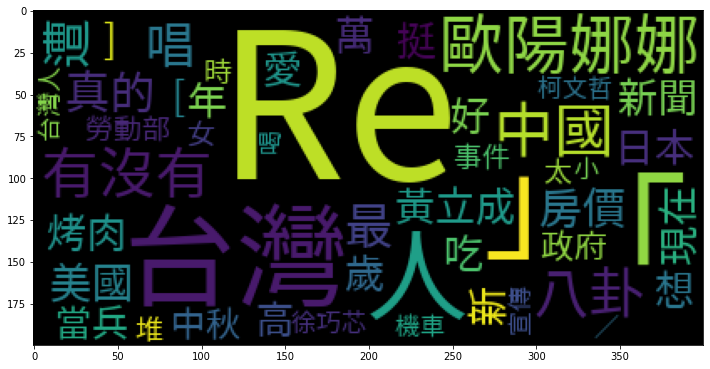

In [52]:
cloud_image = wc.generate_from_frequencies(word_frequent_dict)
plt.figure(figsize = (12,10))
plt.imshow(cloud_image)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [72]:
wordList = [''.join(jieba.lcut(title) for title in clear_title)]

TypeError: sequence item 0: expected str instance, list found

In [73]:
vectorizer = TfidfVectorizer()

In [58]:
corpus={
    "This is first document.",
    "This document is the second document.",
    "And this is third document.",
    "Is this is the first document?"
}
vectorlizer = TfidfVectorizer()
x = vectorlizer.fit_transform(corpus)
print(vectorlizer.get_feature_names())

['and', 'document', 'first', 'is', 'second', 'the', 'third', 'this']


In [59]:
x.toarray()

array([[0.        , 0.57844156, 0.        , 0.28922078, 0.5542311 ,
        0.43696216, 0.        , 0.28922078],
       [0.        , 0.30765316, 0.46481028, 0.61530632, 0.        ,
        0.46481028, 0.        , 0.30765316],
       [0.59581303, 0.31091996, 0.        , 0.31091996, 0.        ,
        0.        , 0.59581303, 0.31091996],
       [0.        , 0.43508727, 0.657341  , 0.43508727, 0.        ,
        0.        , 0.        , 0.43508727]])

In [61]:
tfidf_vc = TfidfVectorizer(token_pattern= r"(?u)\b\w+\b", stop_words=stop_word_list)
tf_idf_matrix = tfidf_vc.fit_transform(wordList)
tf_idf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
df_tfidf = pd.DataFrame(tf_idf_matrix.toarray(), columns=tfidf_vc.get_feature_names(), index=[wordList])

In [63]:
df_tfidf

,01,09,10,100,1000,11,110,12,120,13,...,鼻屎,鼻耳,鼻蛭,龍八,龍山寺,ꬷ,ａ,ｄ,ｈ,ｗ
急,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
梅子粉,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
除了,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
吃,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
一,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
次,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
鹹酥雞,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
tfidf_vc.vocabulary_

{'急': 1938,
 '梅子粉': 2604,
 '沾': 2794,
 '芭樂': 3746,
 '還可以': 4345,
 '配什麼': 4368,
 '小孩': 1667,
 '喜歡': 1166,
 '鬼滅': 4739,
 '刃': 789,
 '教師節': 2341,
 '老師': 3624,
 '教養': 2346,
 '蘇澳': 3830,
 '漁船': 2894,
 '日本': 2415,
 '公務船': 710,
 '擦撞': 2277,
 '未': 2542,
 '出聲': 780,
 '謝長': 4034,
 '再度': 745,
 '惹議': 1980,
 '中國': 367,
 '遊戲': 4294,
 '原神': 945,
 'pc': 175,
 '版': 3011,
 '遭': 4327,
 '韓國': 4602,
 '社會': 3322,
 '歧視': 2701,
 '刺青': 812,
 '人': 462,
 '烤肉': 2955,
 '要烤': 3920,
 '川普': 1731,
 'fake': 118,
 'news': 165,
 '買到': 4085,
 '最': 2479,
 '新': 2375,
 'xbox': 219,
 '一款': 273,
 '買': 4082,
 're': 190,
 '徐巧芯': 1889,
 '支持': 2281,
 '女性': 1462,
 '當兵': 3167,
 '全面': 691,
 '恢復': 1950,
 '徵兵制': 1902,
 'windows': 217,
 '屌': 1710,
 'mac': 154,
 'os': 171,
 '惹': 1978,
 '假掰': 598,
 '食物': 4653,
 '八卦板': 697,
 '要辦': 3926,
 '視訊': 3936,
 '柯文哲': 2581,
 '好': 1478,
 '一定': 263,
 '要選': 3927,
 '總統': 3554,
 '超市': 4133,
 '晚上': 2447,
 '時段': 2445,
 '商品': 1144,
 '特價': 3029,
 '袁世凱': 3886,
 '當年': 3171,
 '不學': 338,
 '習近平': 3611,
 '改': 2294,

# Find Similarity articles from TF-IDF

In [65]:
title_siml =cosine_similarity(tf_idf_matrix, tf_idf_matrix)
title_siml.shape

(21244, 21244)

In [70]:
target_id = 0
most_similar_id = title_siml[target_id].argsort()[-2]
clear_title[target_id]


'急! 梅子粉除了沾芭樂還可以配什麼？'

In [71]:
clear_title[most_similar_id]

IndexError: list index out of range